In [45]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [86]:
def euler_method(func, x0, y0, h, a, b):
    x_list = [x0]
    y_list = [y0]
    for i in np.arange(a + h, b + h, h):
        x = x_list[-1] + h
        y = y_list[-1] + h * func(x_list[-1], y_list[-1])
        x_list.append(round(x, 2))
        y_list.append(y)
    return x_list, [round(y, 6) for y in y_list]


def improved_euler_method(func, x0, y0, h, a, b):
    x_list = [x0]
    y_list = [y0]
    for i in np.arange(a + h, b + h, h):
        x = x_list[-1] + h
        delta_y = h * func(x_list[-1] + h / 2, y_list[-1] + h / 2 * func(x_list[-1], y_list[-1]))
        y = y_list[-1] + delta_y
        x_list.append(round(x, 2))
        y_list.append(y)
    return x_list, [round(y, 6) for y in y_list]


def runge_kuffa_method(func, x0, y0, h, a, b):
    x_list = [x0]
    y_list = [y0]
    for i in np.arange(a + h, b + h, h):
        x = x_list[-1] + h
        k1 = func(x_list[-1], y_list[-1])
        k2 = func(x_list[-1] + h / 2, y_list[-1] + h / 2 * k1)
        k3 = func(x_list[-1] + h / 2, y_list[-1] + h / 2 * k2)
        k4 = func(x_list[-1] + h, y_list[-1] + h * k3)
        delta_y = h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y = y_list[-1] + delta_y
        x_list.append(round(x, 2))
        y_list.append(y)
    return x_list, [round(y, 6) for y in y_list]


In [87]:
def tasks(func, x0, y0, a, b, solution):
    print('Differential Eq: {}'.format(func.__name__))
    print('Initial condition: y({})={}'.format(x0, y0))
    print('Range: [{},{}]'.format(a, b))
    dic = dict()
    # T2
    x, y = euler_method(func, x0, y0, 0.1, a, b)
    dic['x'] = x
    # T1
    dic['T1'] = solution(x)
    dic['T2'] = y
    # T4
    _, y = improved_euler_method(func, x0, y0, 0.1, a, b)
    dic['T4'] = y
    # T6
    _, y = runge_kuffa_method(func, x0, y0, 0.1, a, b)
    dic['T6'] = y
    
    df = pd.DataFrame(dic)
    display(df)
    df.fillna(0, inplace=True)
    ax = df.plot(x='x', y='T1', color='Yellow', figsize=(20,10))
    df.plot(x='x', y='T2', color='Blue', ax=ax)
    df.plot(x='x', y='T4', color='Red', ax=ax)
    df.plot(x='x', y='T6', color='LightGreen', ax=ax)
    
    dic = dict()
    # T3
    x, y = euler_method(func, x0, y0, 0.05, a, b)
    dic['x'] = x
    # T1
    dic['T1'] = solution(x)
    dic['T3'] = y
    # T5
    _, y = improved_euler_method(func, x0, y0, 0.05, a, b)
    dic['T5'] = y
    # T7
    _, y = runge_kuffa_method(func, x0, y0, 0.05, a, b)
    dic['T7'] = y
    
    df = pd.DataFrame(dic)
    display(df)
    df.fillna(0, inplace=True)
    ax = df.plot(x='x', y='T1', color='Yellow', figsize=(20,10))
    df.plot(x='x', y='T3', color='Blue', ax=ax)
    df.plot(x='x', y='T5', color='Red', ax=ax)
    df.plot(x='x', y='T7', color='LightGreen', ax=ax)
    print()
    pass

In [88]:
def func1(x, y):
    try:
        return 2 * (x ** 2) + 3 * (y ** 2) - 2
    except OverflowError:
        return float('inf')


def solution1(x_list):
    def solve(x):
        return None  # coudn't solve o.d.e. in the explicit form
    y_list = []
    for x in x_list:
        y_list.append(solve(x))
    return y_list


def func2(x, y):
    try:
        return y + math.sqrt(x ** 2 + y ** 2)
    except OverflowError:
        return float('inf')


def solution2(x_list):
    def solve(x):
        return None  # coudn't solve o.d.e. in the explicit form
    y_list = []
    for x in x_list:
        y_list.append(solve(x))
    return y_list


def func3(x, y):
    try:
        return x ** 2 - 3 * x * y + y ** 2 - 3 * y
    except OverflowError:
        return float('inf')


def solution3(x_list):
    def solve(x):
        return None  # coudn't solve o.d.e. in the explicit form
    y_list = []
    for x in x_list:
        y_list.append(solve(x))
    return y_list


def func4(x, y):
    try:
        return (1 + x) / (1 - y ** 2)
    except OverflowError:
        return float('inf')


def solution4(x_list):
    def solve(x):
        return None  # coudn't solve o.d.e. in the explicit form
    y_list = []
    for x in x_list:
        y_list.append(solve(x))
    return y_list

Differential Eq: func1
Initial condition: y(2)=1
Range: [2,3]


,x,T1,T2,T4,T6
0,2.0,None,1.000000e+00,1.000000e+00,1.000000e+00
1,2.1,None,1.900000e+00,2.271250e+00,2.466876e+00
2,2.2,None,3.665000e+00,6.435323e+00,1.270621e+01
3,2.3,None,8.462668e+00,5.819249e+01,1.093326e+07
4,2.4,None,3.080569e+01,9.636175e+04,2.433923e+100
5,2.5,None,3.164548e+02,5.820798e+17,inf
6,2.6,None,3.036061e+04,7.748789e+68,inf
7,2.7,None,2.765603e+08,2.433543e+273,inf
8,2.8,None,2.294568e+16,inf,inf
9,2.9,None,1.579512e+32,inf,inf


,x,T1,T3,T5,T7
0,2.00,None,1.000000e+00,1.000000e+00,1.000000e+00
1,2.05,None,1.450000e+00,1.535156e+00,1.550598e+00
2,2.10,None,2.085625e+00,2.391396e+00,2.469650e+00
3,2.15,None,3.079100e+00,4.084694e+00,4.530351e+00
4,2.20,None,4.863478e+00,9.023636e+00,1.496976e+01
5,2.25,None,8.795491e+00,4.463595e+01,4.144944e+04
6,2.30,None,2.080584e+01,5.705984e+03,1.356044e+57
7,2.35,None,8.616728e+01,8.985934e+11,inf
8,2.40,None,1.200340e+03,5.501317e+44,inf
9,2.45,None,2.173231e+05,7.728237e+175,inf


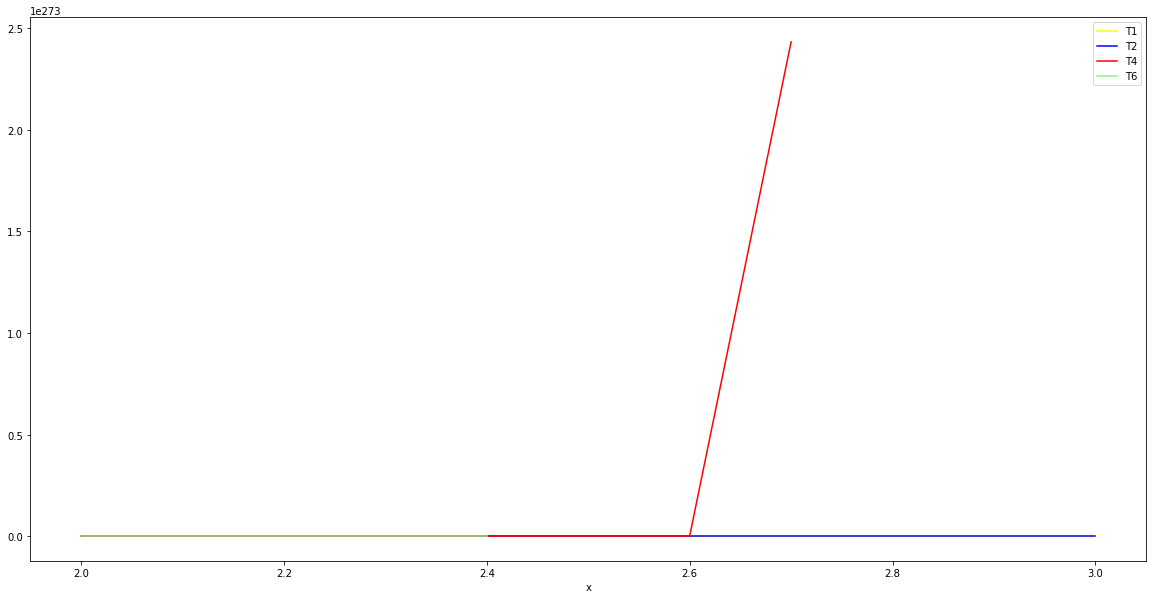

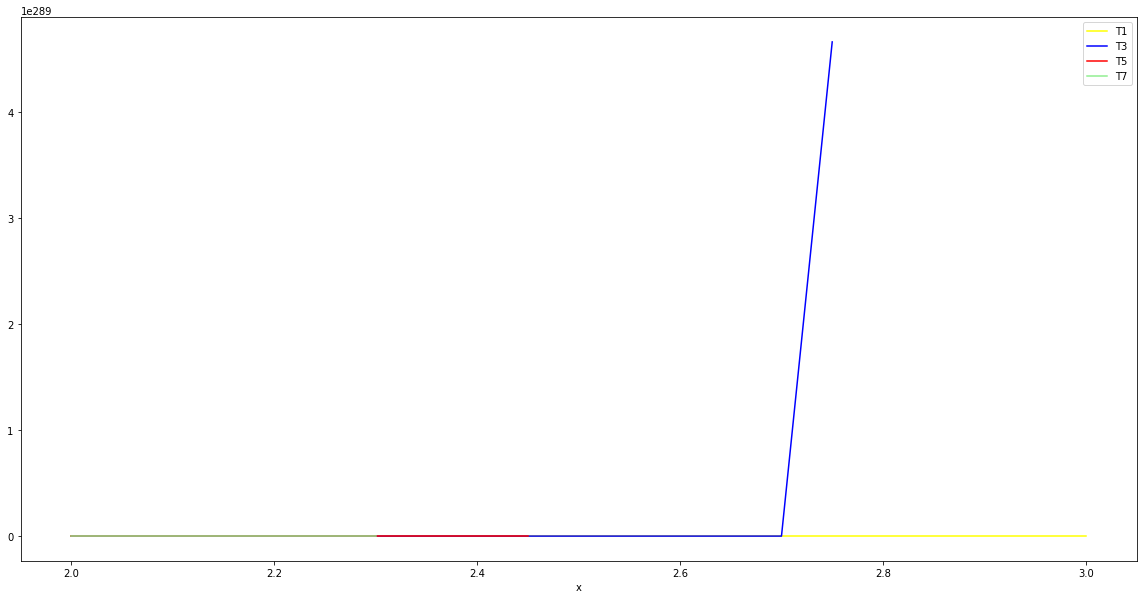

In [89]:
tasks(func1, 2, 1, 2, 3, solution1)

Differential Eq: func2
Initial condition: y(0)=1
Range: [0,1]


,x,T1,T2,T4,T6
0,0.0,None,1.000000,1.000000,1.000000
1,0.1,None,1.200000,1.220114,1.221551
2,0.2,None,1.440416,1.489415,1.492920
3,0.3,None,1.729881,1.819116,1.825519
4,0.4,None,2.078439,2.222603,2.232999
5,0.5,None,2.497941,2.716036,2.731860
6,0.6,None,3.002484,3.319037,3.342167
7,0.7,None,3.608918,4.055500,4.088380
8,0.8,None,4.337427,4.954567,5.000371
9,0.9,None,5.212229,6.051798,6.114631


,x,T1,T3,T5,T7
0,0.00,None,1.000000,1.000000,1.000000
1,0.05,None,1.100000,1.105015,1.105191
2,0.10,None,1.210057,1.221165,1.221554
3,0.15,None,1.331269,1.349702,1.350345
4,0.20,None,1.464817,1.491979,1.492926
5,0.25,None,1.611978,1.649474,1.650780
6,0.30,None,1.774139,1.823801,1.825530
7,0.35,None,1.952813,2.016730,2.018956
8,0.40,None,2.149650,2.230208,2.233017
9,0.45,None,2.366460,2.466381,2.469868


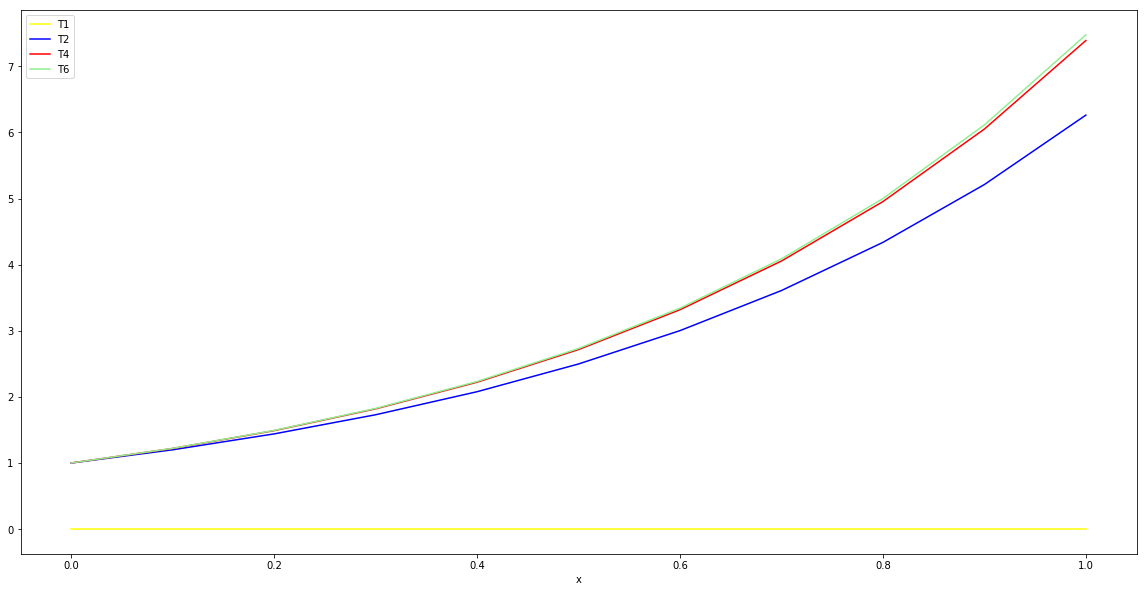

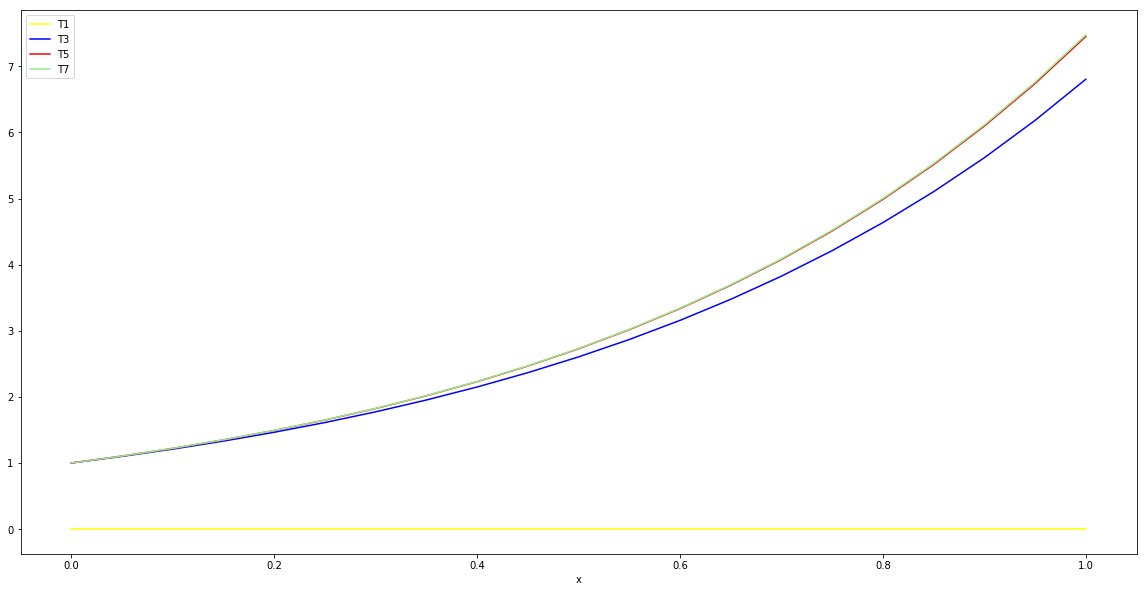

In [90]:
tasks(func2, 0, 1, 0, 1, solution2)

Differential Eq: func3
Initial condition: y(0)=2
Range: [0,1]


,x,T1,T2,T4,T6
0,0.0,None,2.000000,2.000000,2.000000
1,0.1,None,1.800000,1.762750,1.763107
2,0.2,None,1.531000,1.468383,1.470439
3,0.3,None,1.218236,1.154556,1.158256
4,0.4,None,0.900534,0.861690,0.865274
5,0.5,None,0.619406,0.618878,0.620201
6,0.6,None,0.404040,0.437523,0.435584
7,0.7,None,0.262425,0.314495,0.309768
8,0.8,None,0.184475,0.239236,0.232990
9,0.9,None,0.152262,0.199600,0.193117


,x,T1,T3,T5,T7
0,0.00,None,2.000000,2.000000,2.000000
1,0.05,None,1.900000,1.890344,1.890340
2,0.10,None,1.781375,1.763002,1.763094
3,0.15,None,1.646613,1.621403,1.621677
4,0.20,None,1.499264,1.469918,1.470418
5,0.25,None,1.343786,1.313524,1.314239
6,0.30,None,1.185239,1.157367,1.158229
7,0.35,None,1.028857,1.006295,1.007189
8,0.40,None,0.879566,0.864444,0.865237
9,0.45,None,0.741539,0.734963,0.735530


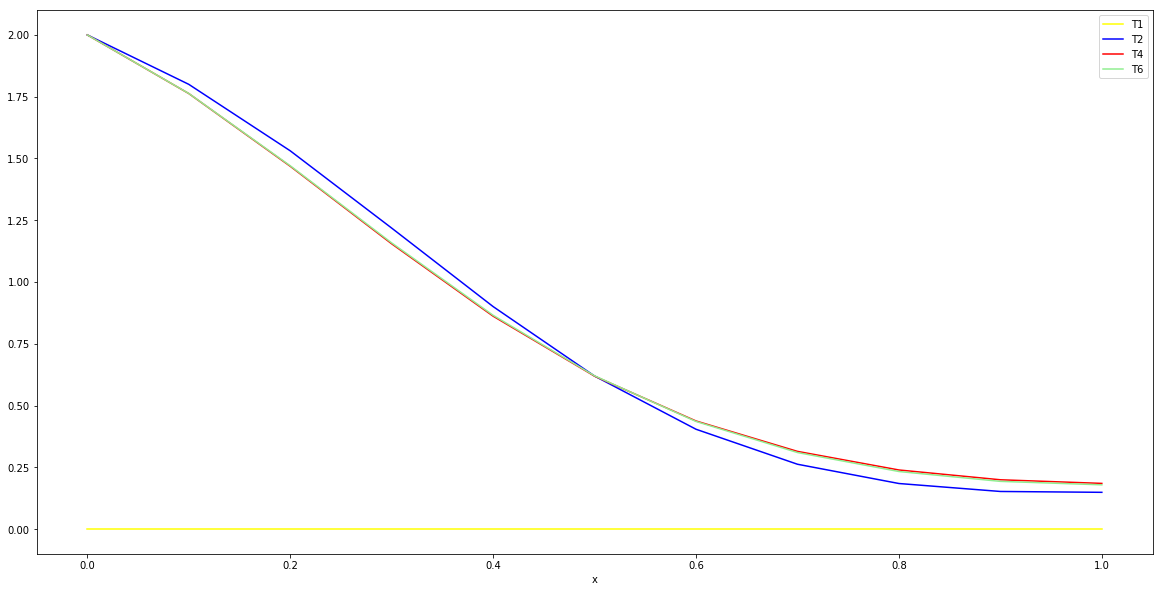

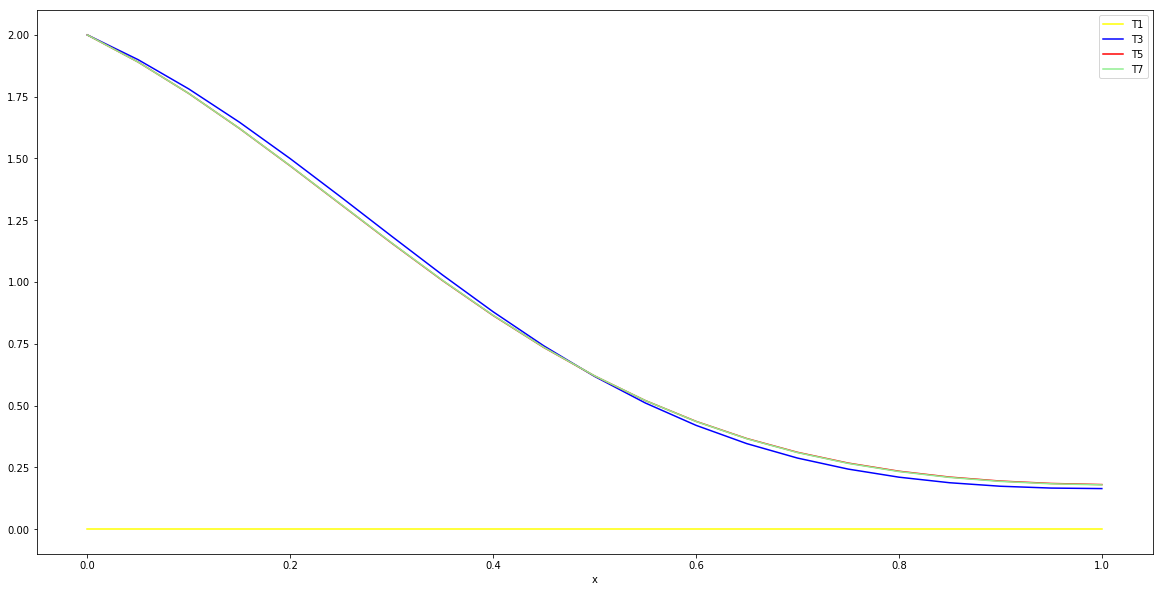

In [91]:
tasks(func3, 0, 2, 0, 1, solution3)

Differential Eq: func4
Initial condition: y(2)=3
Range: [2,3]


,x,T1,T2,T4,T6
0,2.0,None,3.000000,3.000000,3.000000
1,2.1,None,2.962500,2.961333,2.961316
2,2.2,None,2.922636,2.920166,2.920129
3,2.3,None,2.880206,2.876269,2.876207
4,2.4,None,2.834973,2.829369,2.829278
5,2.5,None,2.786657,2.779141,2.779011
6,2.6,None,2.734924,2.725186,2.725009
7,2.7,None,2.679367,2.667017,2.666778
8,2.8,None,2.619486,2.604018,2.603697
9,2.9,None,2.554659,2.535400,2.534970


,x,T1,T3,T5,T7
0,2.00,None,3.000000,3.000000,3.000000
1,2.05,None,2.981250,2.980960,2.980958
2,2.10,None,2.961916,2.961320,2.961316
3,2.15,None,2.941976,2.941056,2.941049
4,2.20,None,2.921401,2.920138,2.920129
5,2.25,None,2.900166,2.898538,2.898526
6,2.30,None,2.878239,2.876223,2.876207
7,2.35,None,2.855587,2.853157,2.853138
8,2.40,None,2.832175,2.829301,2.829278
9,2.45,None,2.807963,2.804612,2.804584


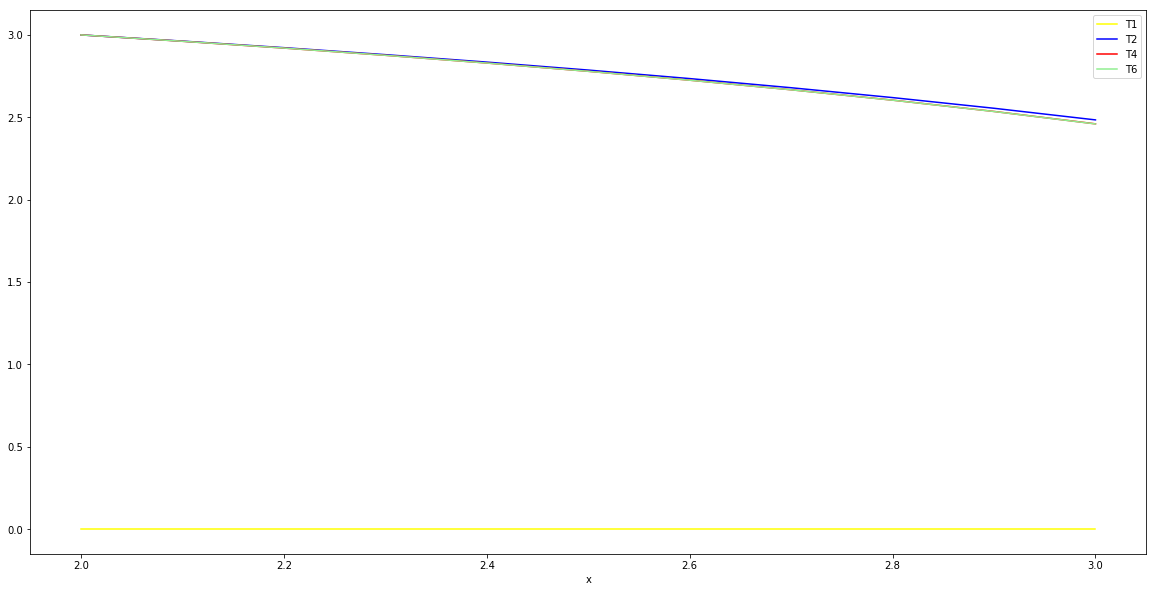

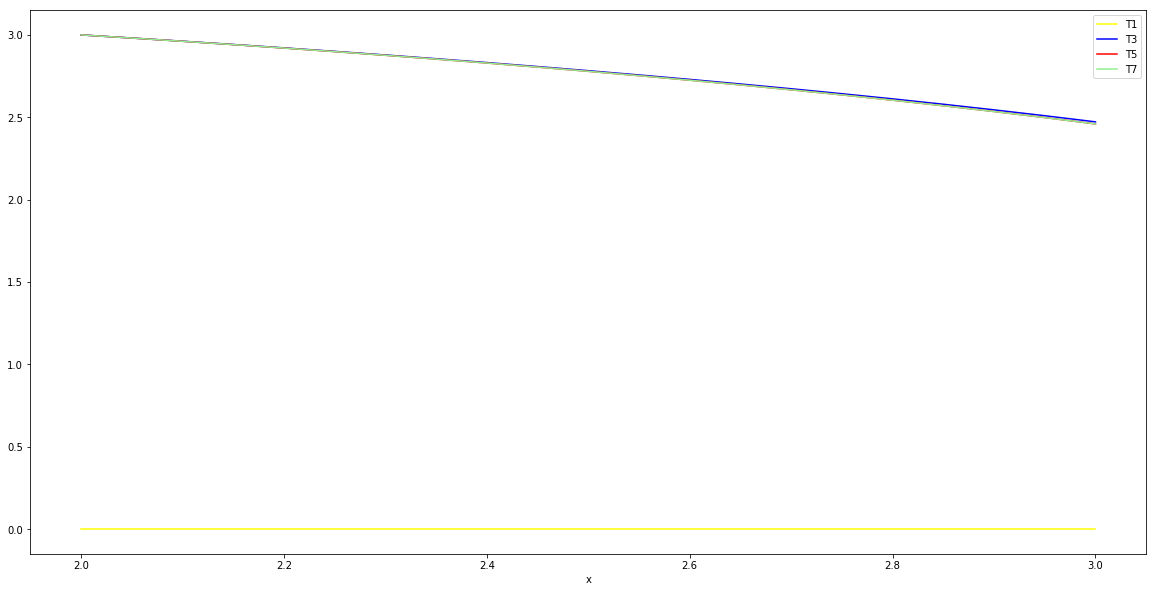

In [92]:
tasks(func4, 2, 3, 2, 3, solution4)